<a href="https://colab.research.google.com/github/pedrosena138/if1014-data-mining/blob/main/SMD_Me%CC%81todos_KNN_e_LVQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiros dados
   num-pregnant  glucose  diastolic  triceps-skin  insulin  body-mass  \
0             6      148         72            35        0       33.6   
1             1       85         66            29        0       26.6   
2             8      183         64             0        0       23.3   
3             1       89         66            23       94       28.1   
4             0      137         40            35      168       43.1   

   diabetes-pedigree  age  class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  


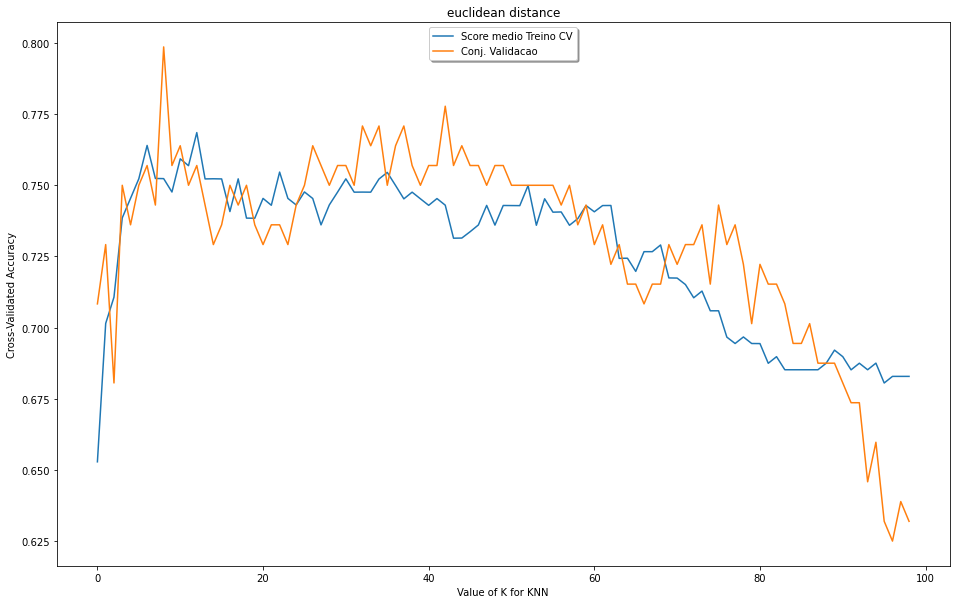

Acuracia de treinamento clf: 0.808
Acuracia de teste clf: 0.703


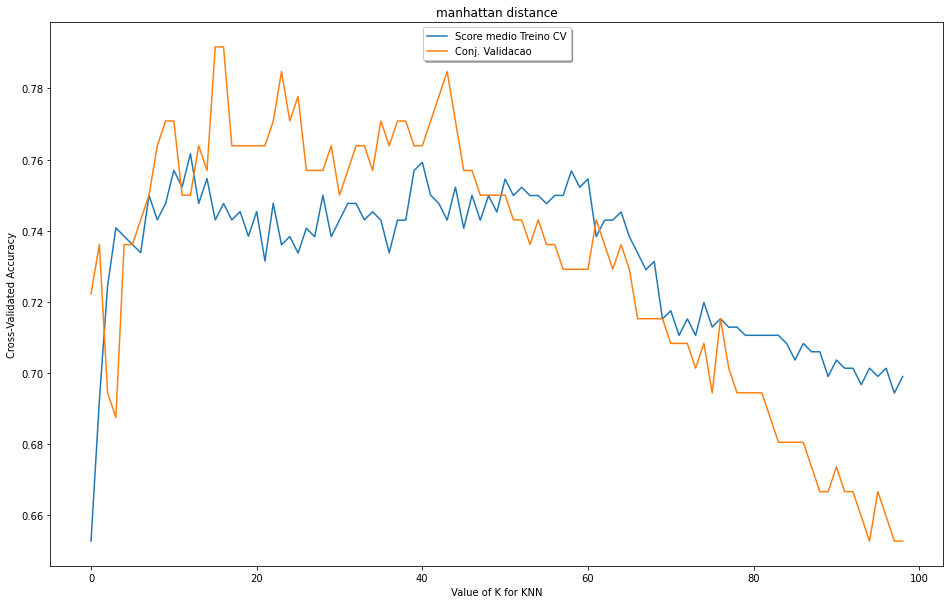

Acuracia de treinamento clf: 0.808
Acuracia de teste clf: 0.703


In [ ]:
#
#
# USANDO O K-NN NA BASE DE DADOS DO DIABETES
# ESCOLHENDO VARIOS K'S PARA A BASE
#

import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
plt.rcParams['figure.figsize'] = [16, 10]

import random
random.seed(10)


#definindo os nomes de cada coluna   
names = ['num-pregnant', 'glucose', 'diastolic', 'triceps-skin', 'insulin', 'body-mass', 'diabetes-pedigree', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning          
dataset = pandas.read_csv("pima-indians-diabetes.csv", names=names)

print("Primeiros dados")
print(dataset.head(5))

#divisao de dados atributos e classe
X = dataset.values[:, 0:len(dataset.values[0])-1] #caracteristicas
Y = dataset.values[:, len(dataset.values[0])-1] #classe

#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier()

clf = clf.fit(X_train, y_train)

#p_range = range(1, 198) #k
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
vet_distancias = ["euclidean", "manhattan"]

for d in vet_distancias:
    k_range = range(1, 100) #k
    k_scores_train = []
    k_scores_train_full = []
    k_scores_valid = []

    for j in k_range:
        knn = neighbors.KNeighborsClassifier(n_neighbors=j, metric=d)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        k_scores_train.append(scores.mean())
        knn.fit(X_train, y_train)
        k_scores_train_full.append(knn.score(X_train, y_train))
        k_scores_valid.append(knn.score(X_valid, y_valid))

    # plot to see clearly
    plt.plot(list(range(0,len(k_scores_train))), k_scores_train)
    # plt.plot(list(range(0,len(k_scores_train_full))), k_scores_train_full)
    plt.plot(list(range(0,len(k_scores_valid))), k_scores_valid)
    plt.title(f'{d} distance')
    plt.legend(('Score medio Treino CV', 'Conj. Validacao'),
            loc='upper center', shadow=True)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

    print("Acuracia de treinamento clf: %0.3f" %  clf.score(X_train, y_train))
    print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))


In [ ]:
pip install neupy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.0/208.0 KB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.2/197.2 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 48.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tableprint: filename=tableprint-0.7.1-py3-none-any.whl size=6180 sha256=

Primeiros dados
   num-pregnant  glucose  diastolic  triceps-skin  insulin  body-mass  \
0             6      148         72            35        0       33.6   
1             1       85         66            29        0       26.6   
2             8      183         64             0        0       23.3   
3             1       89         66            23       94       28.1   
4             0      137         40            35      168       43.1   

   diabetes-pedigree  age  class  
0              0.627   50      1  
1              0.351   31      0  
2              0.672   32      1  
3              0.167   21      0  
4              2.288   33      1  


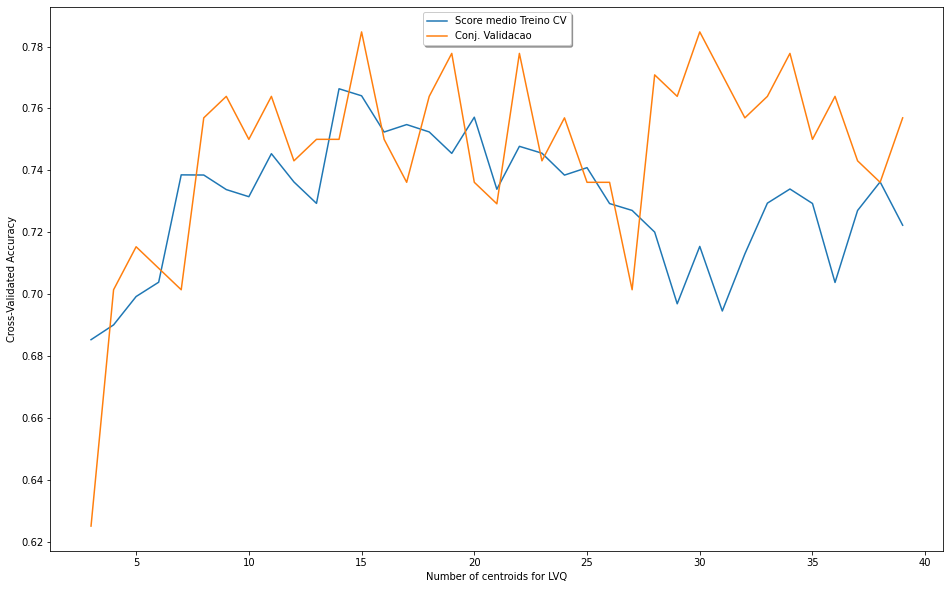

Acuracia de treinamento clf: 0.819
Acuracia de teste clf: 0.698


In [ ]:
#
#
# USANDO O LVQ NA BASE DE DADOS DO DIABETES
# ESCOLHENDO VARIOS PROTOTIPOS PARA A BASE
#

import pandas
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from neupy import algorithms
from sklearn.metrics import accuracy_score
plt.rcParams['figure.figsize'] = [16, 10]

#definindo os nomes de cada coluna   
names = ['num-pregnant', 'glucose', 'diastolic', 'triceps-skin', 'insulin', 'body-mass', 'diabetes-pedigree', 'age', 'class']

#Fazendo o carregamento dos dados diretamente do UCI Machine Learning          
dataset = pandas.read_csv("pima-indians-diabetes.csv", names=names)

print("Primeiros dados")
print(dataset.head(5))

#divisao de dados atributos e classe
X = dataset.values[:, 0:len(dataset.values[0])-1] #caracteristicas
Y = dataset.values[:, len(dataset.values[0])-1] #classe

#usando o metodo para fazer uma unica divisao dos dados
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.25, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)


# we create an instance of Neighbours Classifier and fit the data.
lvqnet = algorithms.LVQ(n_inputs=7, n_classes=2)

lvqnet.train(X_train, y_train, epochs=20)

p_range = range(3, 40)
p_scores_train = []
p_scores_train_full = []
p_scores_valid = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for p in p_range:
    lvqnet = algorithms.LVQ(n_inputs=7, n_classes=2, n_subclasses=p)
    scores = cross_val_score(lvqnet, X_train, y_train, cv=5, scoring='accuracy')
    p_scores_train.append(scores.mean())
    lvqnet.train(X_train, y_train, epochs=20)
    #p_scores_train_full.append(accuracy_score(lvqnet.predict(X_train),y_train))
    p_scores_valid.append(accuracy_score(lvqnet.predict(X_valid), y_valid))

# plot to see clearly
plt.plot(p_range, p_scores_train)
#plt.plot(p_range, p_scores_train_full)
plt.plot(p_range, p_scores_valid)
plt.legend(('Score medio Treino CV', 'Conj. Validacao'),
           loc='upper center', shadow=True)
plt.xlabel('Number of centroids for LVQ')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Acuracia de treinamento clf: %0.3f" %  accuracy_score(lvqnet.predict(X_train),y_train))
print("Acuracia de teste clf: %0.3f" %  accuracy_score(lvqnet.predict(X_test), y_test))
